# Problem Statement

### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### Variables Description

- Item_Identifier:	Unique product ID
- Item_Weight:	Weight of product
- Item_Fat_Content:	Whether the product is low fat or not
- Item_Visibility:	The % of total display area of all products in a store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:	Unique store ID
- Outlet_Establishment_Year:	The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of city in which the store is located
- Outlet_Type:	Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the outcome variable to be predicted.
 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('Train.csv')
df.shape

(8523, 12)

In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [74]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [75]:
df.drop(['Item_Identifier'], axis = 1, inplace = True)

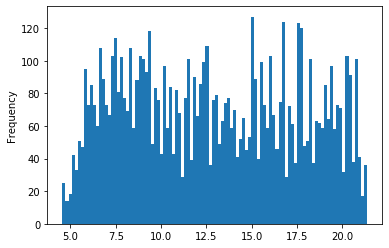

In [76]:
df['Item_Weight'].plot.hist(bins = 100)

In [77]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [78]:
df['Item_Weight'].fillna(value = 12.150, inplace = True)

In [79]:
df['Item_Weight'].isnull().sum()

0

In [80]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [81]:
df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'}, inplace = True)

In [82]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

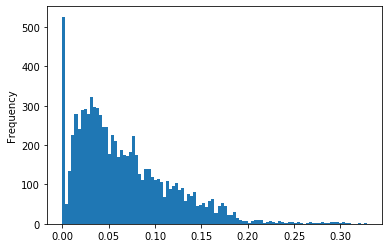

In [83]:
df['Item_Visibility'].plot.hist(bins = 100)

(array([526.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          6.,   0.,   0.,  26.,  19.,  23.,  28.,  50.,  28.,  69.,  66.,
         86.,  73., 121., 105., 102., 111., 130., 142., 124., 186., 188.,
        154., 195., 178., 221., 203., 166., 236., 206., 202., 138., 219.,
        193., 175., 183., 210., 156., 202., 250., 200., 146., 168., 173.,
        155., 150., 162., 125., 136., 162., 133., 141., 104., 140.,  80.,
         82., 115.,  72.,  99.,  59.,  56.,  21.,  15.,  12.,  21.,   8.,
         11.,  14.,  10.,   8.,   4.,   5.,  10.,   6.,  12.,   7.,   2.,
          3.]),
 array([0.        , 0.00689917, 0.01379835, 0.02069752, 0.02759669,
        0.03449587, 0.04139504, 0.04829421, 0.05519339, 0.06209256,
        0.06899173, 0.07589091, 0.08279008, 0.08968925, 0.09658843,
        0.1034876 , 0.11038677, 0.11728595, 0.12418512, 0.13108429,
        0.13798347, 0.14488264, 0.15178181, 0.

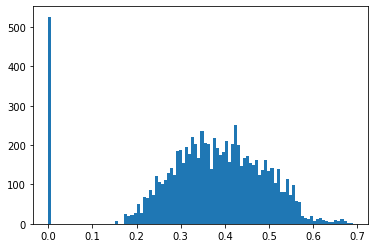

In [84]:
plt.hist(np.cbrt(df['Item_Visibility']), bins = 100)

In [85]:
df['Item_Visibility'] = np.cbrt(df['Item_Visibility'])

(array([526.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          6.,   0.,   0.,  26.,  19.,  23.,  28.,  50.,  28.,  69.,  66.,
         86.,  73., 121., 105., 102., 111., 130., 142., 124., 186., 188.,
        154., 195., 178., 221., 203., 166., 236., 206., 202., 138., 219.,
        193., 175., 183., 210., 156., 202., 250., 200., 146., 168., 173.,
        155., 150., 162., 125., 136., 162., 133., 141., 104., 140.,  80.,
         82., 115.,  72.,  99.,  59.,  56.,  21.,  15.,  12.,  21.,   8.,
         11.,  14.,  10.,   8.,   4.,   5.,  10.,   6.,  12.,   7.,   2.,
          3.]),
 array([0.        , 0.00689917, 0.01379835, 0.02069752, 0.02759669,
        0.03449587, 0.04139504, 0.04829421, 0.05519339, 0.06209256,
        0.06899173, 0.07589091, 0.08279008, 0.08968925, 0.09658843,
        0.1034876 , 0.11038677, 0.11728595, 0.12418512, 0.13108429,
        0.13798347, 0.14488264, 0.15178181, 0.

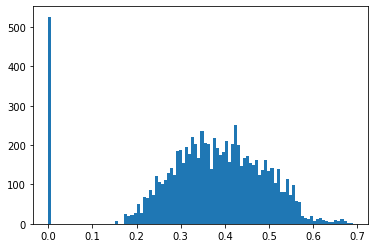

In [86]:
plt.hist(df['Item_Visibility'], bins = 100)

In [87]:
df['Item_Type'].value_counts()/len(df)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

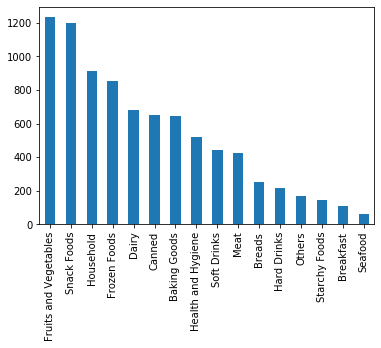

In [88]:
df['Item_Type'].value_counts().plot.bar()

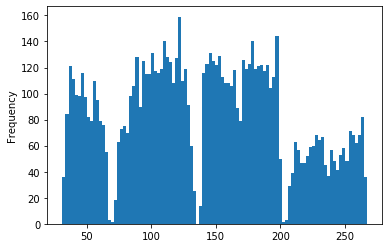

In [89]:
df['Item_MRP'].plot.hist(bins = 100)

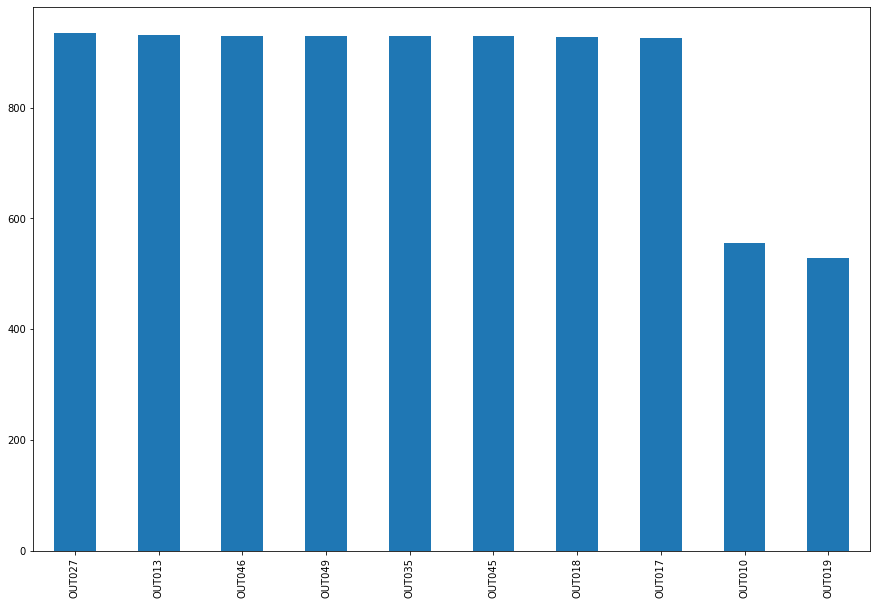

In [90]:
plt.figure(figsize = (15,10))
df['Outlet_Identifier'].value_counts().plot.bar()

In [91]:
df['Outlet_Identifier'].value_counts()/len(df)

OUT027    0.109703
OUT013    0.109351
OUT046    0.109117
OUT049    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

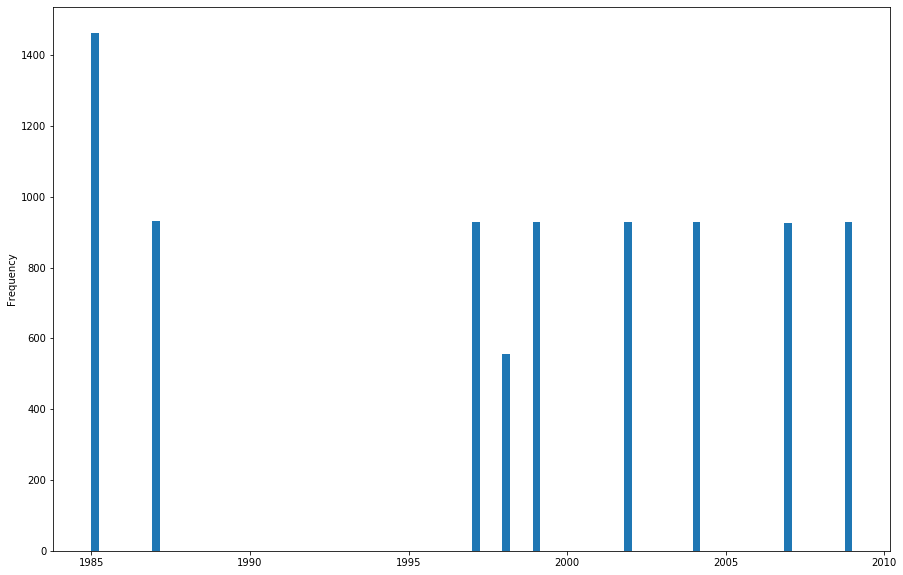

In [92]:
plt.figure(figsize = (15,10))
df['Outlet_Establishment_Year'].plot.hist(bins = 100)

In [93]:
df['Outlet_Establishment_Year'].value_counts()/len(df)

1985    0.171653
1987    0.109351
1999    0.109117
1997    0.109117
2004    0.109117
2002    0.108999
2009    0.108882
2007    0.108647
1998    0.065118
Name: Outlet_Establishment_Year, dtype: float64

In [94]:
df['Outlet_Size'].value_counts()/len(df)

Medium    0.327702
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

In [102]:
df['Outlet_Size'].fillna(value = 'Medium', inplace = True)

In [95]:
df['Outlet_Location_Type'].value_counts()/len(df)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

In [96]:
df['Outlet_Type'].value_counts()/len(df)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

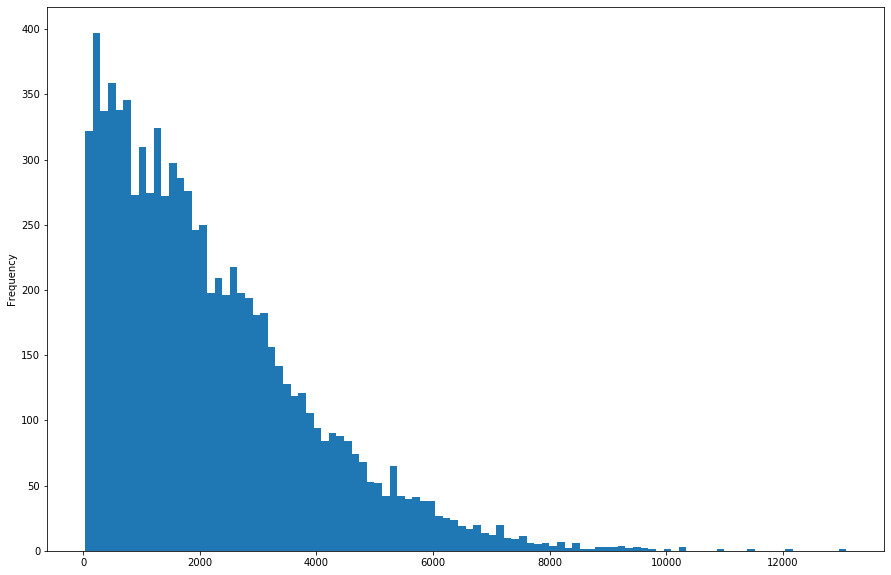

In [97]:
plt.figure(figsize = (15,10))
df['Item_Outlet_Sales'].plot.hist(bins = 100)

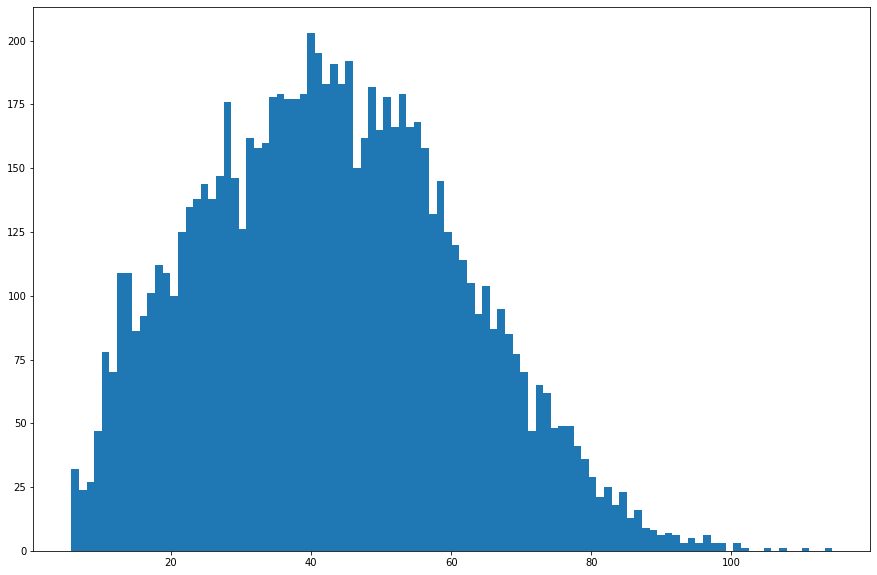

(array([ 17.,  18.,  14.,   9.,  16.,  19.,  31.,  41.,  58.,  32.,  61.,
         84.,  79.,  58.,  57.,  74.,  62.,  83.,  77.,  86.,  67.,  97.,
         99., 107., 107., 127., 113., 115., 117., 157., 119., 121., 124.,
        161., 127., 151., 165., 166., 166., 164., 170., 197., 188., 180.,
        185., 189., 171., 188., 159., 169., 167., 198., 165., 196., 175.,
        179., 170., 143., 145., 135., 134., 128., 101., 111., 105., 109.,
         93.,  81.,  66.,  73.,  74.,  59.,  61.,  58.,  36.,  36.,  28.,
         26.,  28.,  18.,  16.,  13.,   8.,   9.,   7.,   4.,   5.,   7.,
          5.,   1.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.]),
 array([ 3.21690275,  3.42039034,  3.62387793,  3.82736553,  4.03085312,
         4.23434071,  4.4378283 ,  4.6413159 ,  4.84480349,  5.04829108,
         5.25177868,  5.45526627,  5.65875386,  5.86224145,  6.06572905,
         6.26921664,  6.47270423,  6.67619182,  6.87967942,  7.08316701,
         7.2866546 ,  7.49

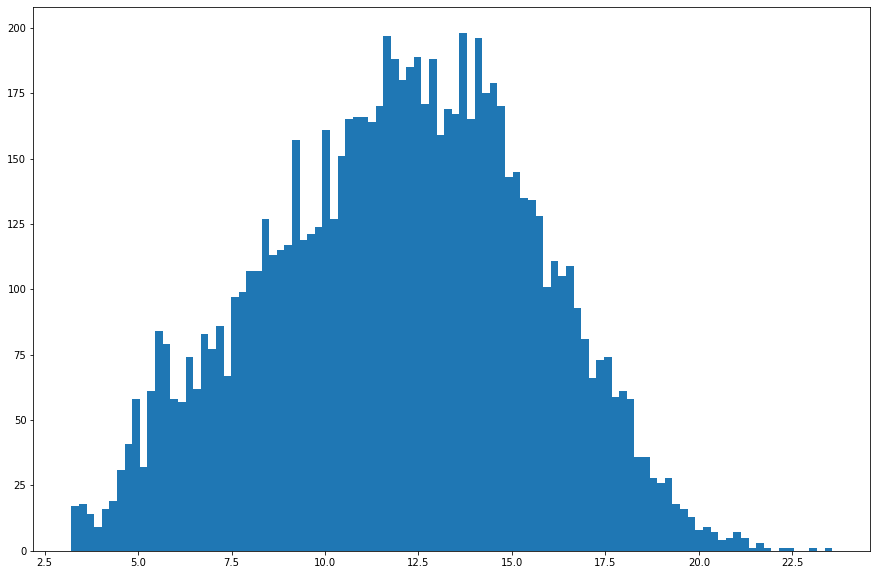

In [98]:
plt.figure(figsize = (15,10))
plt.hist(np.sqrt(df['Item_Outlet_Sales']), bins = 100)
plt.show()
plt.figure(figsize = (15,10))
plt.hist(np.cbrt(df['Item_Outlet_Sales']), bins = 100)

In [99]:
df['Item_Outlet_Sales'] = np.cbrt(df['Item_Outlet_Sales'])

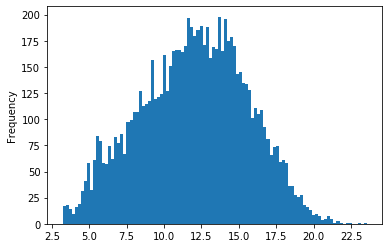

In [100]:
df['Item_Outlet_Sales'].plot.hist(bins = 100)

### Here cube root transofrmation of variable have been applied to remove skewness. Thereore for the final answer, we'd have to take Cube


# Bivariate Analysis

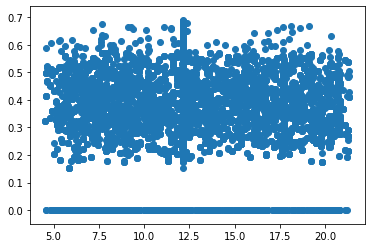

In [104]:
plt.scatter(df['Item_Weight'], df['Item_Visibility'])

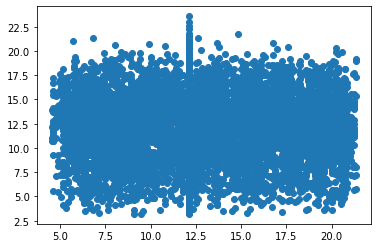

In [105]:
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])

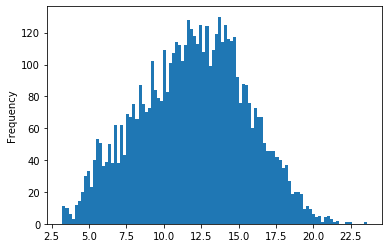

In [106]:
df.loc[(df['Item_Fat_Content'] == 'Low Fat')]['Item_Outlet_Sales'].plot.hist(bins = 100)

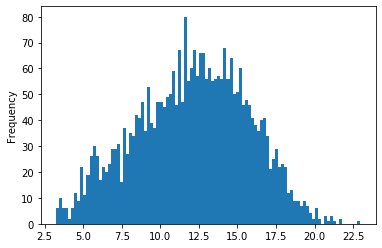

In [107]:
df.loc[(df['Item_Fat_Content'] == 'Regular')]['Item_Outlet_Sales'].plot.hist(bins = 100)

 - Low Fat Products have a higher sales than the regular fat products

In [108]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

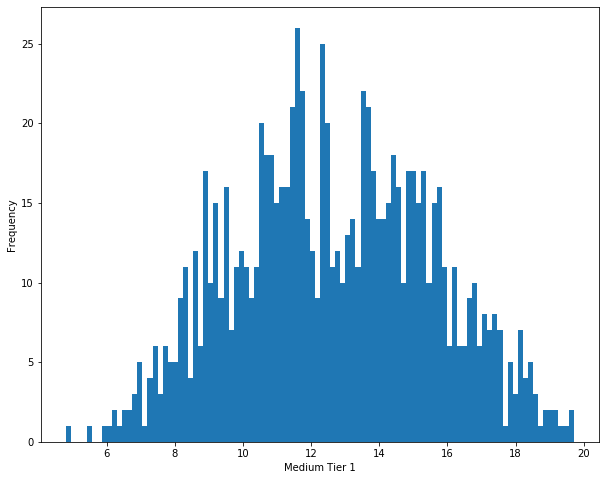

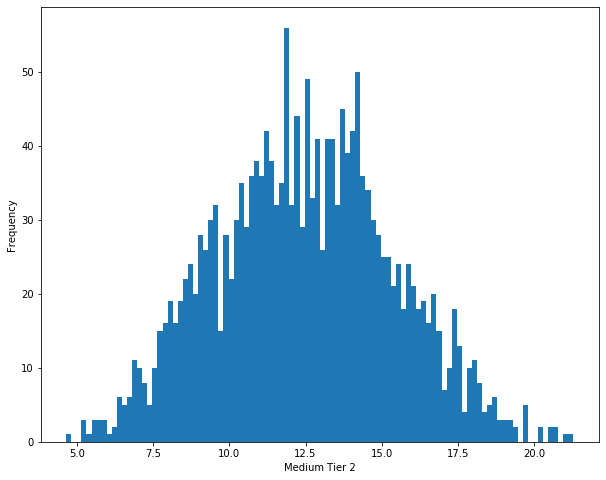

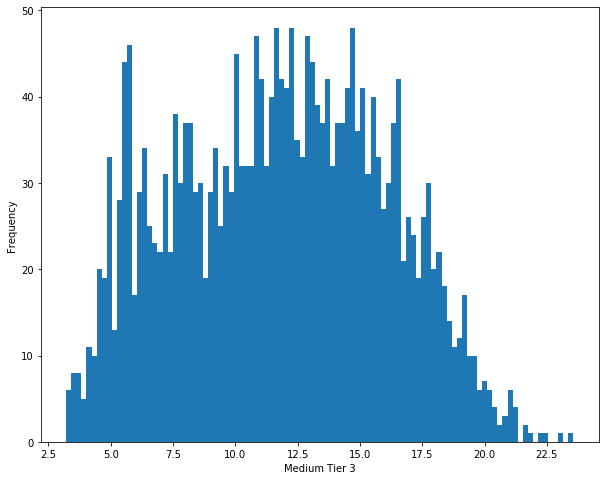

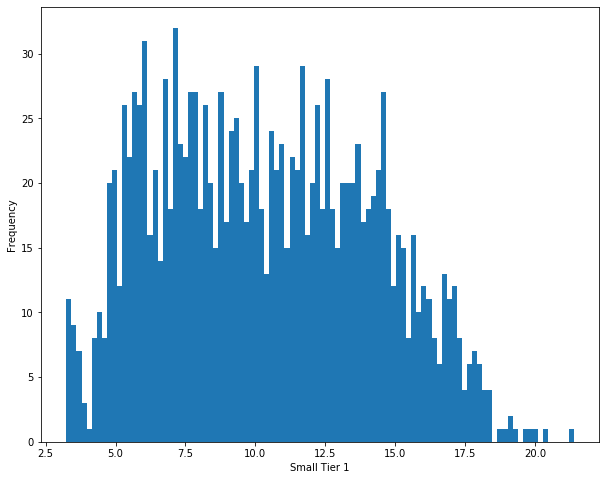

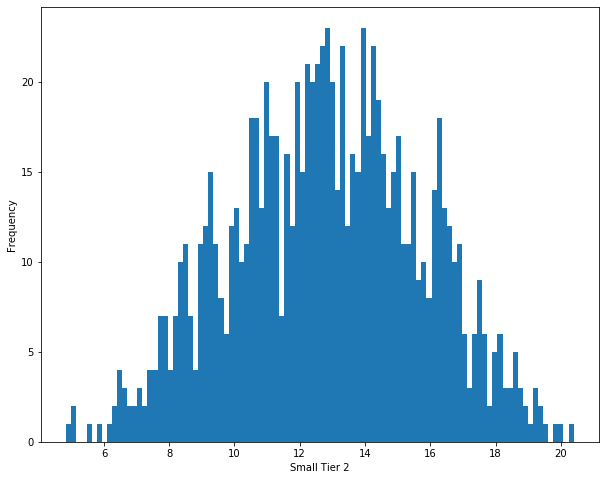

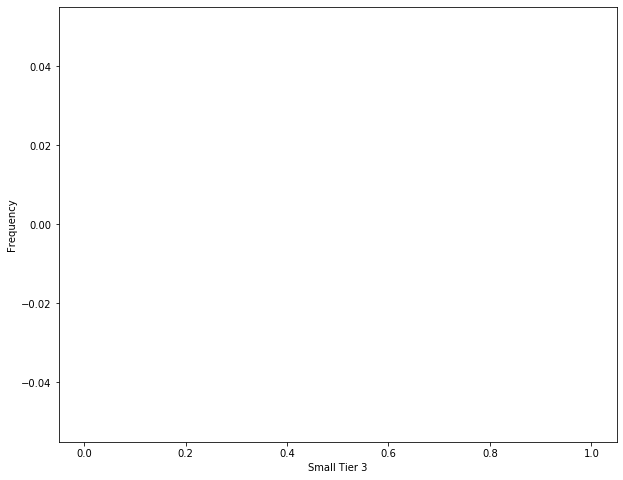

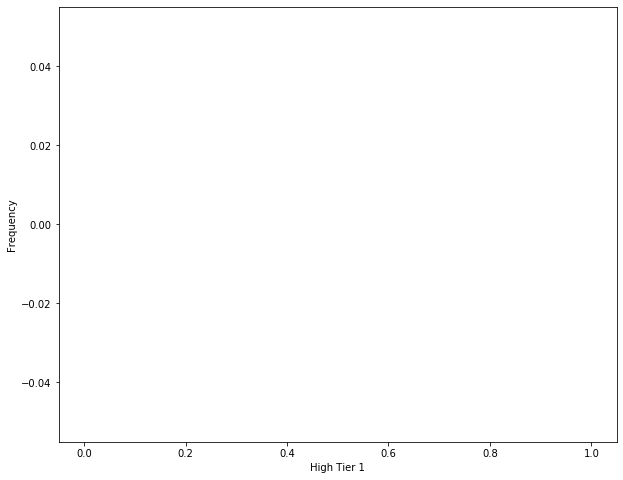

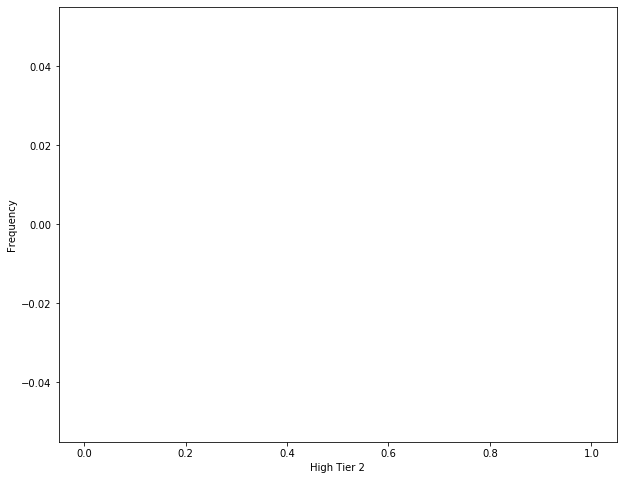

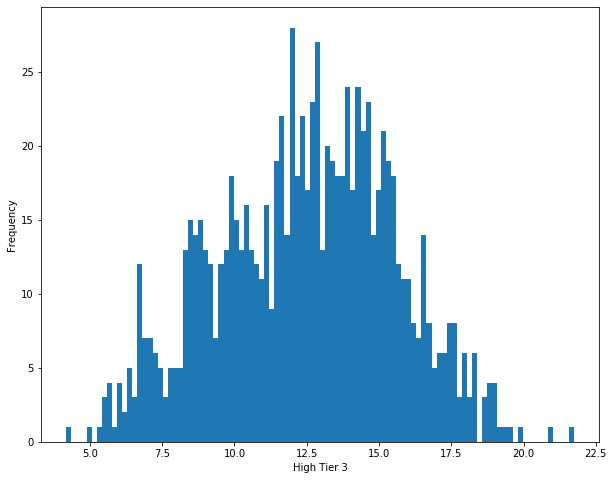

In [113]:
outletSize = ['Medium', 'Small', 'High']
outletLocation = ['Tier 1', 'Tier 2', 'Tier 3']

for i in outletSize:
    for j in outletLocation:
        plt.figure(figsize = (10,8))
        df.loc[(df['Outlet_Size'] == i)&(df['Outlet_Location_Type'] == j)]['Item_Outlet_Sales'].plot.hist(bins = 100)
        plt.xlabel(i + ' ' +j)
        plt.show()

- Small Sized Outlets are only in Tier 1&2 Cities whereas High Sized Outlets are only in Tier 3 cities. Medium Sized Outlets are present in all types of cities.

In [119]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

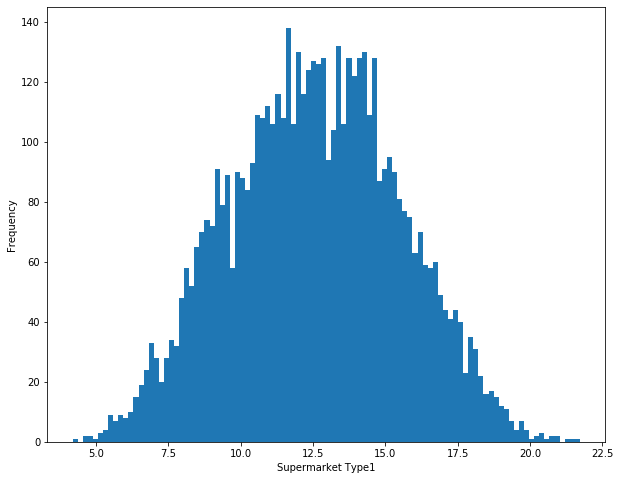

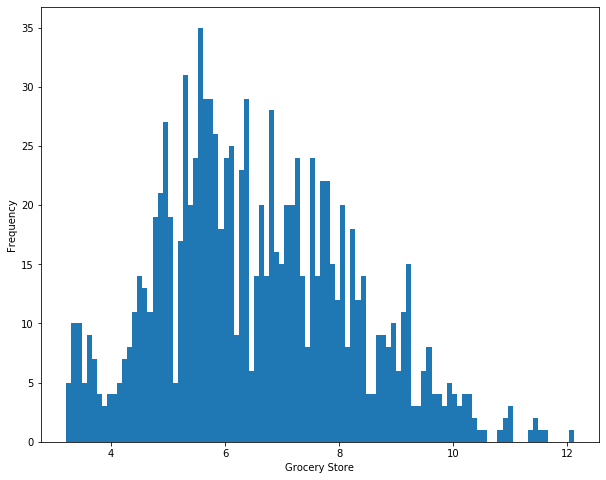

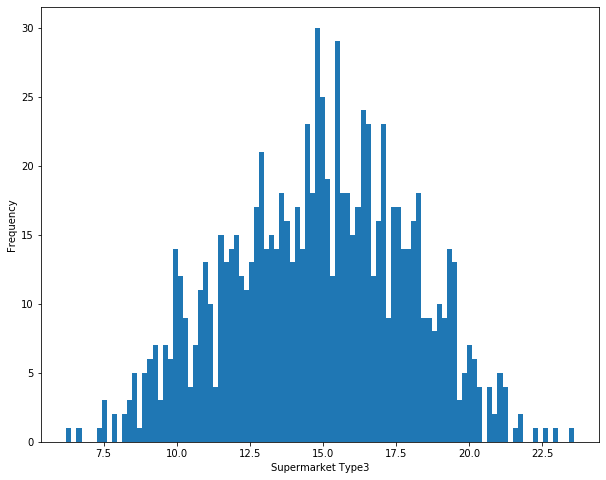

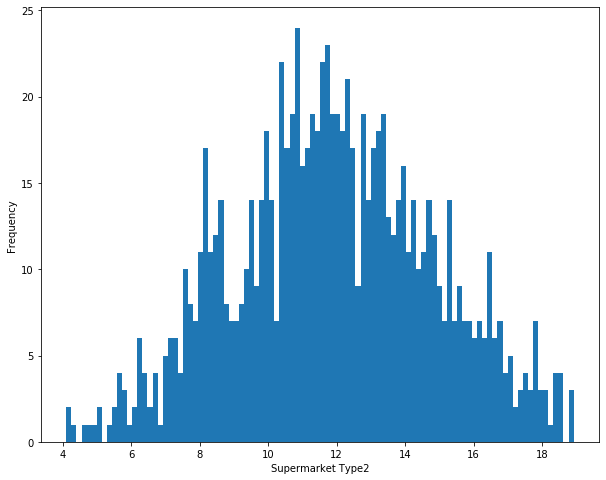

In [130]:
outletType = ['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2']

for i in outletType:
    plt.figure(figsize = (10,8))
    df.loc[(df['Outlet_Type'] == i)]['Item_Outlet_Sales'].plot.hist(bins = 100)
    plt.xlabel(i)
    plt.show()

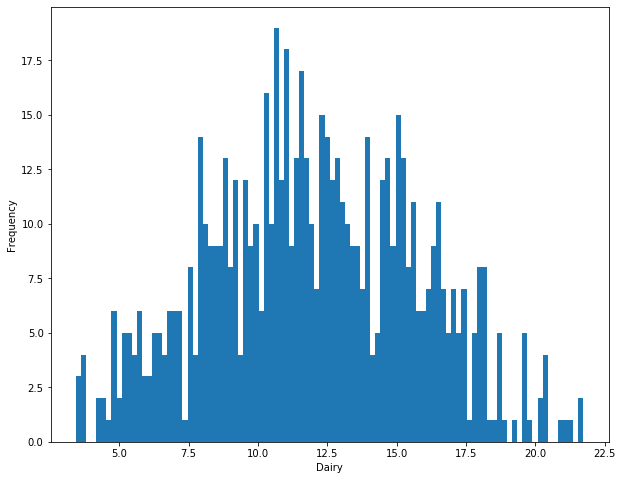

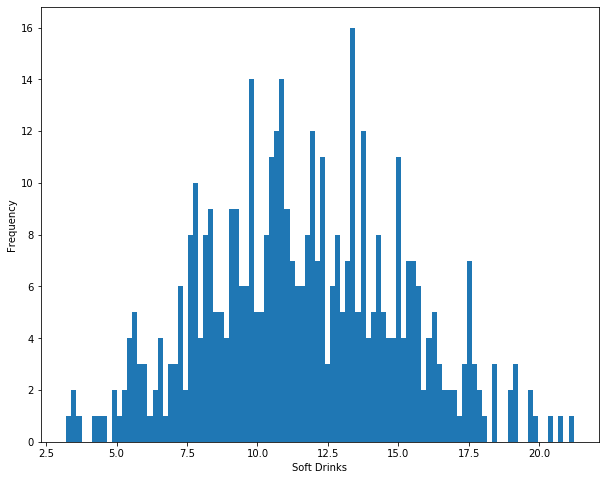

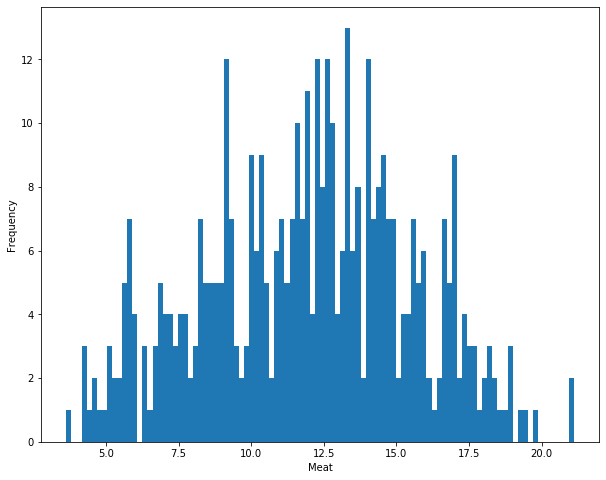

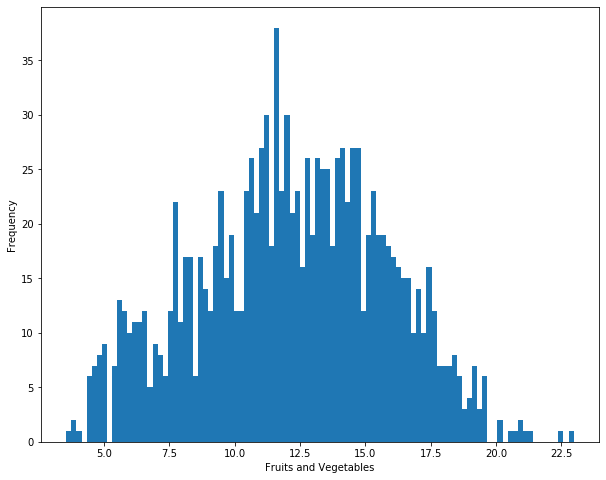

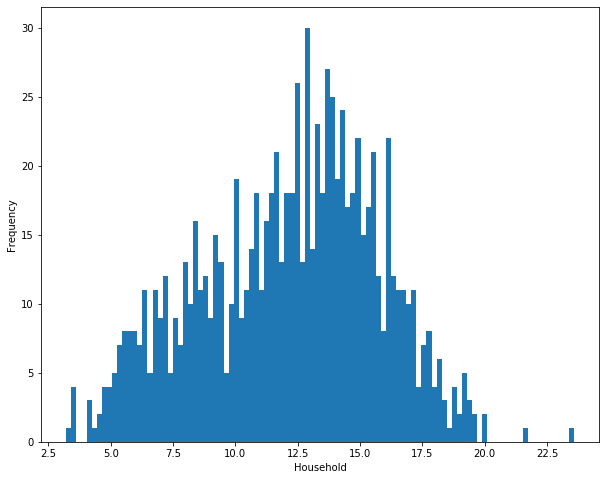

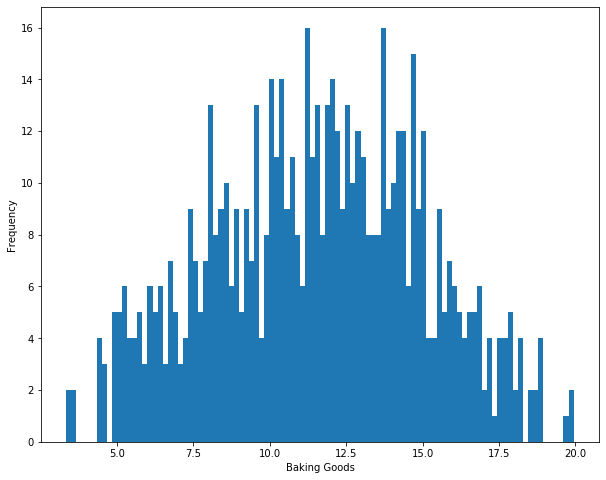

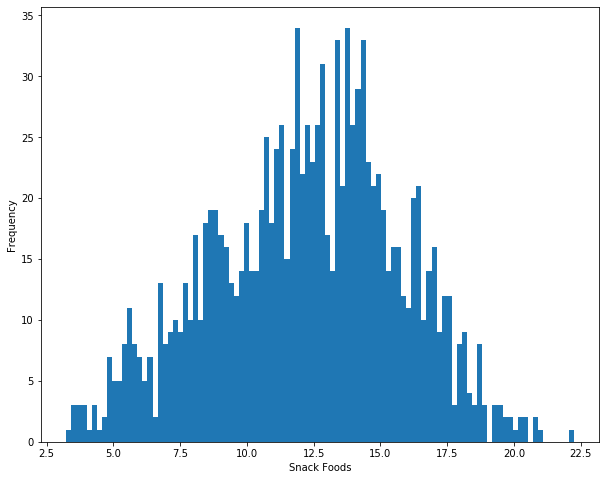

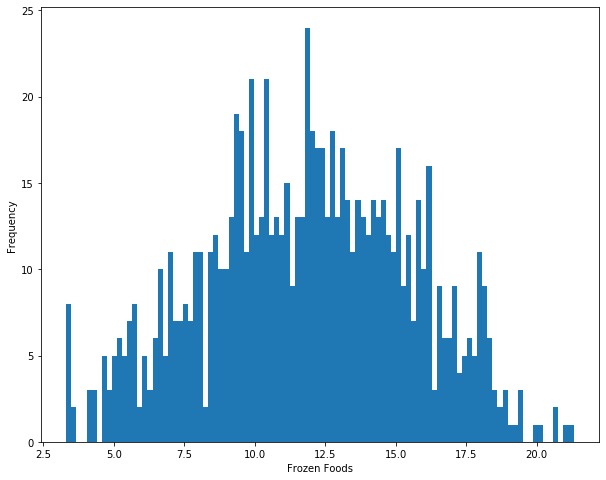

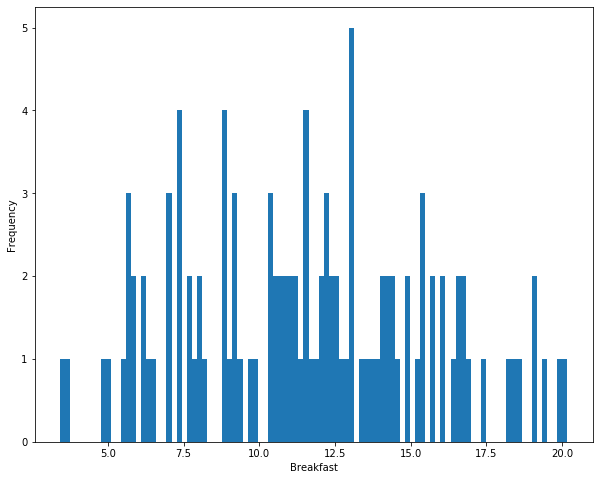

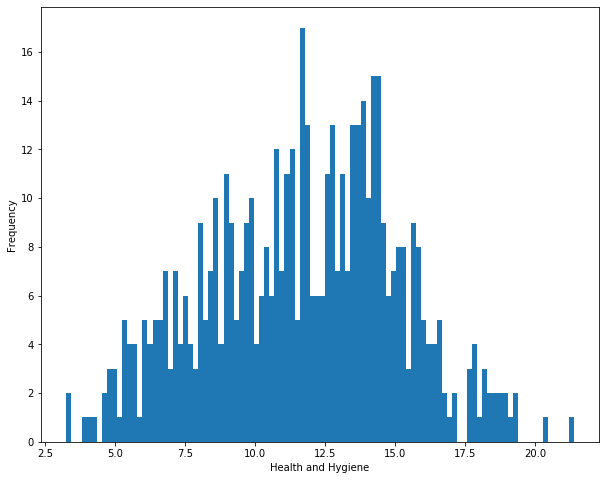

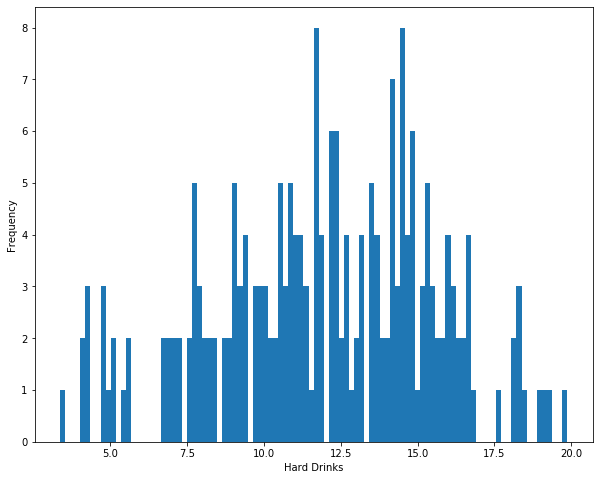

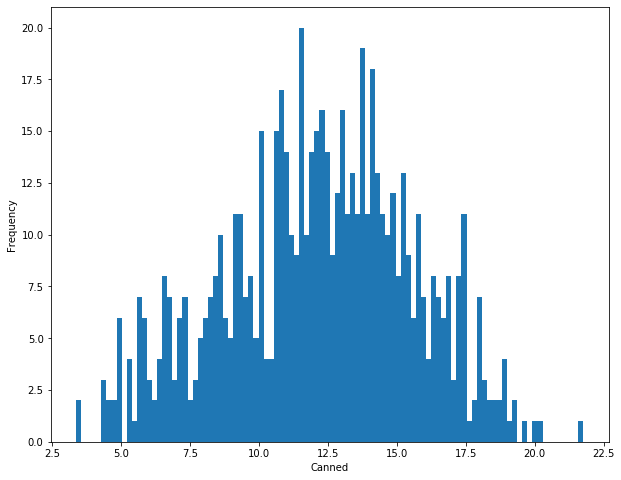

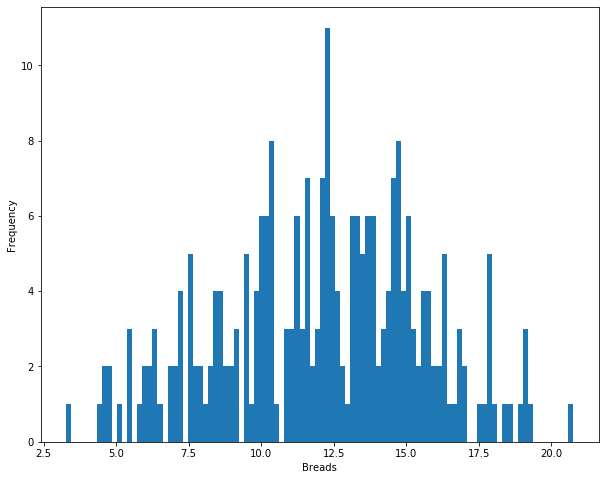

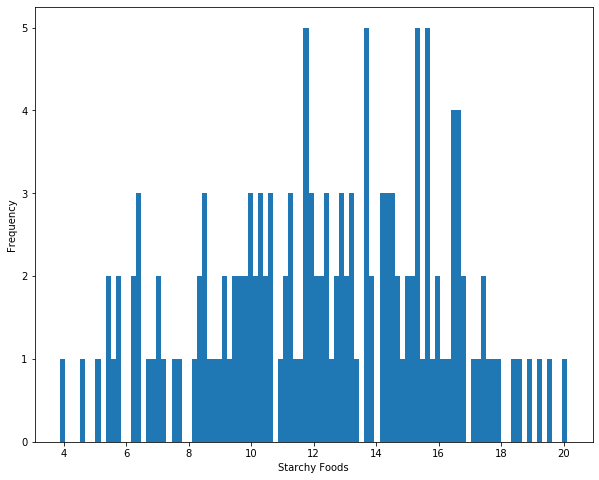

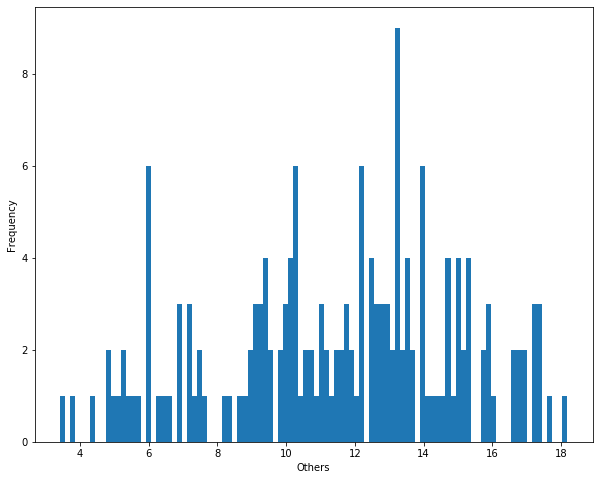

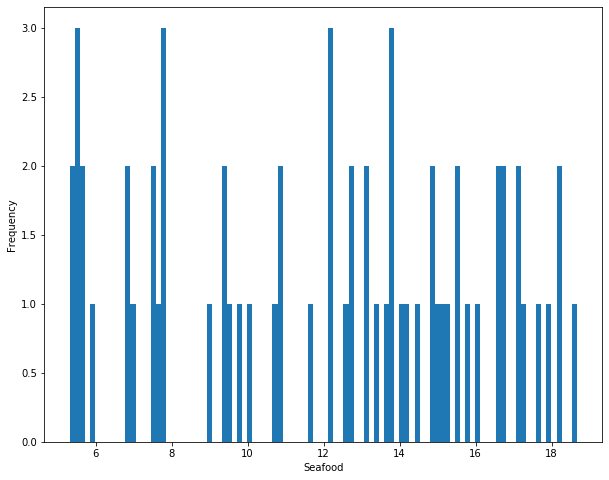

In [140]:
temp = []

for i in df['Item_Type']:
    if i not in temp:
        temp.append(i)

for i in temp:
    plt.figure(figsize = (10,8))
    df.loc[(df['Item_Type'] == i)]['Item_Outlet_Sales'].plot.hist(bins = 100)
    plt.xlabel(i)
    plt.show()

# Predictive Modelling

In [142]:
df = pd.get_dummies(df)

In [143]:
x = df.drop(['Item_Outlet_Sales'], axis = 1)
y  = df['Item_Outlet_Sales']

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_log_error as msle

In [147]:
x = StandardScaler().fit_transform(x)

In [148]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 101)

## Linear Regression

In [149]:
lr = LR()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
np.sqrt(msle(ytrain, lr.predict(xtrain)))

0.1655211672492853

In [151]:
np.sqrt(msle(ytest, lr.predict(xtest)))

0.16834822682298015

## Random Forest

In [159]:
trainErr = []
testErr = []

for i in range(1,151):
    rfr = RFR(max_depth = i)
    rfr.fit(xtrain, ytrain)
    
    trainErr.append(np.sqrt(msle(ytrain, rfr.predict(xtrain))))
    testErr.append(np.sqrt(msle(ytest, rfr.predict(xtest))))

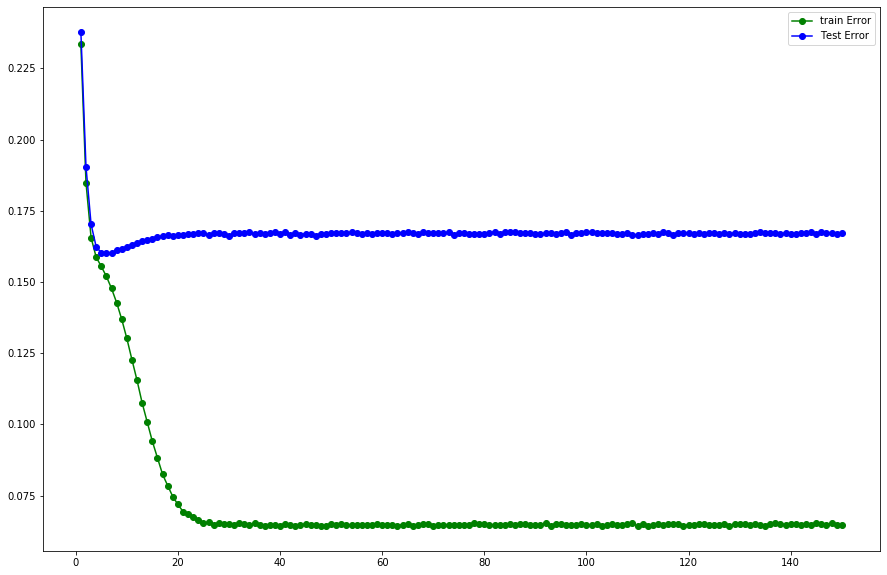

In [160]:
plt.figure(figsize = (15,10))
plt.plot(range(1,151), trainErr, label = 'train Error', marker = 'o', c = 'green')
plt.plot(range(1,151), testErr, label = 'Test Error', marker = 'o', c = 'blue')
plt.legend()
plt.show()

In [161]:
rfr = RFR(max_depth = 23)
rfr.fit(xtrain, ytrain)
np.sqrt(msle(ytest, rfr.predict(xtest)))

0.16753014885779424

# Decision Tree

In [162]:
trainErr = []
testErr = []

for i in range(1,51):
    dtr = DTR(max_depth = i)
    dtr.fit(xtrain, ytrain)
    
    trainErr.append(np.sqrt(msle(ytrain, dtr.predict(xtrain))))
    testErr.append(np.sqrt(msle(ytest, dtr.predict(xtest))))

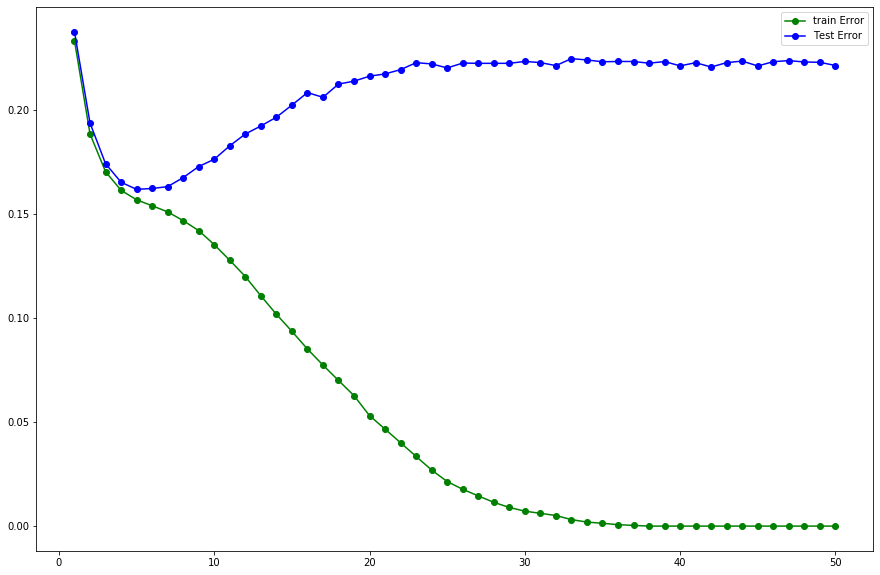

In [163]:
plt.figure(figsize = (15,10))
plt.plot(range(1,51), trainErr, label = 'train Error', marker = 'o', c = 'green')
plt.plot(range(1,51), testErr, label = 'Test Error', marker = 'o', c = 'blue')
plt.legend()
plt.show()

In [164]:
dtr = DTR(max_depth = 6)
dtr.fit(xtrain, ytrain)
np.sqrt(msle(ytest, dtr.predict(xtest)))

0.1624730735048677

# K-NN

In [165]:
trainErr = []
testErr = []

for i in range(1,101):
    knr = KNR(n_neighbors = i)
    knr.fit(xtrain, ytrain)
    
    trainErr.append(np.sqrt(msle(ytrain, knr.predict(xtrain))))
    testErr.append(np.sqrt(msle(ytest, knr.predict(xtest))))

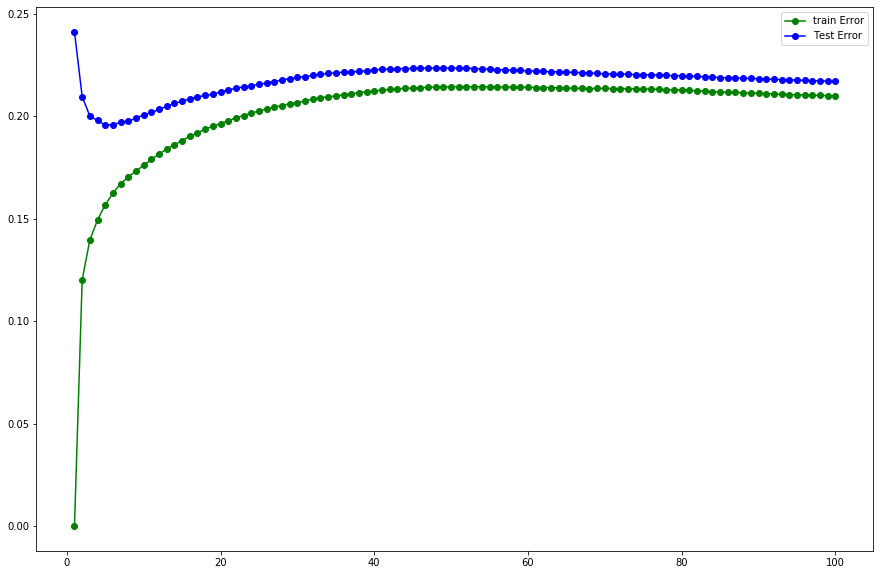

In [166]:
plt.figure(figsize = (15,10))
plt.plot(range(1,101), trainErr, label = 'train Error', marker = 'o', c = 'green')
plt.plot(range(1,101), testErr, label = 'Test Error', marker = 'o', c = 'blue')
plt.legend()
plt.show()

In [170]:
knr = KNR(n_neighbors = 26)
knr.fit(xtrain, ytrain)
np.sqrt(msle(ytest, knr.predict(xtest)))

0.21633729783979755

# SVM

In [167]:
svr = SVR()
svr.fit(xtrain, ytrain)
np.sqrt(msle(ytrain, svr.predict(xtrain))), np.sqrt(msle(ytest, svr.predict(xtest)))

(0.15767171837567256, 0.16760356962588902)